# 📚 Natural Language Processing - Vector Semantics and Embeddings

## 🎯 Goals of this notebook
- Understand the basics of vector semantics
- Learn the difference between sparse and dense vector representations
- Master key concepts like term-document matrices, word-context matrices, and weighting schemes
- Explore Word2Vec and how neural embeddings work
- Implement simple code examples for these concepts
- Apply and test your knowledge through interactive exercises

## 1. Introduction to Vector Semantics

### 📖 **What is Vector Semantics?**

Vector semantics is a powerful way to represent word meaning in natural language processing. The core idea is surprisingly simple yet profound:

> A word's meaning can be represented as a point in a multi-dimensional space - a **vector**.

This approach, also called the **distributional hypothesis**, is based on the intuition that words with similar meanings tend to occur in similar contexts. As linguist J.R. Firth famously said in 1957:

> "You shall know a word by the company it keeps."

For example, the words "cat" and "dog" often appear in similar contexts (pet, animal, fur, etc.), so their vector representations should be close to each other in our semantic space.

### 💡 Curiosity: From Philosophy to Computation

The idea that "meaning is use" actually has philosophical roots in Ludwig Wittgenstein's later work. Rather than trying to define words with formal logical definitions, Wittgenstein suggested that "the meaning of a word is its use in the language." This philosophical insight eventually led to computational approaches to semantics!

### 📖 **Why Vectors for Words?**

Why represent words as vectors? There are several advantages:

1. **Quantifiable similarity**: We can measure how similar two words are by measuring the distance between their vectors
2. **Continuous representation**: Instead of discrete, binary relationships, we get graduated similarities
3. **Automatic learning**: These relationships can be learned from large text corpora
4. **Computation-friendly**: Vector operations are efficient and well-supported

### 🧪 Try it yourself: Word similarity

Think about these word pairs. Which ones seem most similar in meaning?
- cat / dog
- cat / table
- run / sprint
- happy / sad
- happy / joyful

If you thought cat/dog, run/sprint, and happy/joyful were the most similar pairs, you're already thinking like a vector semantics system! Later, we'll see how our algorithms capture these similarities.

## 2. From Words to Vectors: The Basics

### 📖 **Two Types of Vector Representations**

There are two main types of vector representations for words:

1. **Sparse vectors**: Very high-dimensional with mostly zeros
   - Dimensions often = vocabulary size (tens of thousands)
   - Each dimension has a clear interpretation
   - Examples: one-hot vectors, tf-idf, PPMI matrices

2. **Dense vectors**: Lower-dimensional with mostly non-zero values
   - Dimensions typically range from 50-1000
   - Dimensions don't have clear interpretations
   - Examples: word2vec, GloVe, fastText

### 📖 **Representing Words in Vector Space**

Let's start with the simplest approach to understand how we might represent words as vectors.

#### One-Hot Encoding

The simplest vector representation is a **one-hot vector**:
- Create a vector with length = vocabulary size
- Set element i to 1 if it corresponds to word i
- Set all other elements to 0

For example, with vocabulary [cat, dog, house, book, run]:

- "cat" = [1, 0, 0, 0, 0]
- "dog" = [0, 1, 0, 0, 0]
- "book" = [0, 0, 0, 1, 0]

### ⚡ Challenge: One-Hot Encoding Limitation

Can you think of a major limitation of one-hot encoding for representing word meaning?

<details>
<summary>Click to see the answer</summary>

One-hot encoding treats all words as equally different from each other! The distance between any two different words is exactly the same, so we don't capture any notion of semantic similarity.

For example, "cat" and "dog" are just as different as "cat" and "algorithm" according to one-hot encoding, which doesn't match our intuition about meaning.
</details>

### 📖 **Building Better Vectors: Co-occurrence Counts**

To capture similarity, we need to look at how words are used in context. A simple but powerful approach is to count **co-occurrences** - how often words appear near each other in text.

There are two main types of co-occurrence matrices:

1. **Term-Document Matrix**: Rows = words, Columns = documents
2. **Term-Term Matrix** (or Word-Context Matrix): Rows = target words, Columns = context words

Let's look at each one!

## 3. Term-Document Matrices

### 📖 **The Term-Document Matrix**

A term-document matrix represents words based on which documents they appear in:
- Each row represents a word (term)
- Each column represents a document
- Each cell value shows how many times that word occurs in that document

For example, with documents about "pets", "cooking", and "sports":

|          | doc_pets | doc_cooking | doc_sports |
|----------|----------|-------------|------------|
| cat      | 5        | 0           | 0          |
| dog      | 7        | 0           | 0          |
| flour    | 0        | 4           | 0          |
| recipe   | 0        | 6           | 0          |
| ball     | 1        | 0           | 8          |
| team     | 0        | 0           | 5          |

Notice how words that appear in similar documents will have similar vectors. "Cat" and "dog" both appear in the pets document, making their vectors similar.

### 💻 Code section: Creating a Term-Document Matrix

Let's create a simple term-document matrix from scratch:

In [3]:
import numpy as np
import pandas as pd
from collections import Counter

# Sample documents
documents = [
    "I love my cat and dog.",
    "My cat is playful.",
    "Dogs are loyal pets.",
    "I enjoy cooking pasta and pizza.",
    "Italian food uses tomatoes and herbs.",
    "Basketball teams play on courts.",
    "The player scored many points in the basketball game."
]

# Step 1: Tokenize (split into words and normalize)
def simple_tokenize(text):
    # Convert to lowercase and remove punctuation
    return text.lower().replace('.', '').replace(',', '').split()

tokenized_docs = [simple_tokenize(doc) for doc in documents]

# Step 2: Create vocabulary (unique words across all documents)
vocab = sorted(set(word for doc in tokenized_docs for word in doc))

# Step 3: Create the term-document matrix
term_doc_matrix = np.zeros((len(vocab), len(documents)))

# Fill the matrix with word counts
for doc_idx, doc in enumerate(tokenized_docs):
    word_counts = Counter(doc)
    for word_idx, word in enumerate(vocab):
        term_doc_matrix[word_idx, doc_idx] = word_counts.get(word, 0)

# Create DataFrame for better visualization
df = pd.DataFrame(term_doc_matrix, index=vocab, columns=[f"doc_{i+1}" for i in range(len(documents))])

print("Vocabulary size:", len(vocab))
print("\nTerm-Document Matrix:")
print(df)

Vocabulary size: 33

Term-Document Matrix:
            doc_1  doc_2  doc_3  doc_4  doc_5  doc_6  doc_7
and           1.0    0.0    0.0    1.0    1.0    0.0    0.0
are           0.0    0.0    1.0    0.0    0.0    0.0    0.0
basketball    0.0    0.0    0.0    0.0    0.0    1.0    1.0
cat           1.0    1.0    0.0    0.0    0.0    0.0    0.0
cooking       0.0    0.0    0.0    1.0    0.0    0.0    0.0
courts        0.0    0.0    0.0    0.0    0.0    1.0    0.0
dog           1.0    0.0    0.0    0.0    0.0    0.0    0.0
dogs          0.0    0.0    1.0    0.0    0.0    0.0    0.0
enjoy         0.0    0.0    0.0    1.0    0.0    0.0    0.0
food          0.0    0.0    0.0    0.0    1.0    0.0    0.0
game          0.0    0.0    0.0    0.0    0.0    0.0    1.0
herbs         0.0    0.0    0.0    0.0    1.0    0.0    0.0
i             1.0    0.0    0.0    1.0    0.0    0.0    0.0
in            0.0    0.0    0.0    0.0    0.0    0.0    1.0
is            0.0    1.0    0.0    0.0    0.0    0.0    0


### ⚙️ How the code works

1. We start with a list of simple documents (sentences)
2. We tokenize each document by converting to lowercase, removing punctuation, and splitting into words
3. We create a vocabulary of all unique words across documents
4. We initialize a matrix of zeros with dimensions (vocab_size × num_documents)
5. For each document, we:
   - Count how many times each word appears
   - Update the corresponding matrix cell
6. We display the result as a pandas DataFrame for readability

### 📖 **Measuring Word Similarity**

Once we have our term-document matrix, we can measure word similarity! The most common way is using **cosine similarity**:

$$\text{cosine}(\vec{v}, \vec{w}) = \frac{\vec{v} \cdot \vec{w}}{|\vec{v}||\vec{w}|} = \frac{\sum_{i=1}^{n} v_i w_i}{\sqrt{\sum_{i=1}^{n} v_i^2} \sqrt{\sum_{i=1}^{n} w_i^2}}$$

Cosine similarity:
- Ranges from -1 (opposite) to 1 (identical)
- Measures the angle between vectors, not their magnitude
- Value of 1 means vectors point in same direction (similar context)
- Value of 0 means vectors are orthogonal (unrelated context)

### 💻 Code section: Calculating Cosine Similarity

In [4]:

from sklearn.metrics.pairwise import cosine_similarity

# Get the vectors for specific words
def get_word_vector(word, vocab, matrix):
    if word in vocab:
        word_idx = vocab.index(word)
        return matrix[word_idx, :]
    else:
        return None

# Let's calculate similarity between 'cat' and various words
target_word = 'cat'
comparison_words = ['dog', 'playful', 'cooking', 'basketball']

target_vector = get_word_vector(target_word, vocab, term_doc_matrix)

if target_vector is not None:
    print(f"Similarities with '{target_word}':")
    for word in comparison_words:
        comp_vector = get_word_vector(word, vocab, term_doc_matrix)
        if comp_vector is not None:
            similarity = cosine_similarity([target_vector], [comp_vector])[0][0]
            print(f"  {target_word} - {word}: {similarity:.4f}")
        else:
            print(f"  '{word}' not in vocabulary")
else:
    print(f"'{target_word}' not in vocabulary")


Similarities with 'cat':
  cat - dog: 0.7071
  cat - playful: 0.7071
  cat - cooking: 0.0000
  cat - basketball: 0.0000




### 🧪 Try it yourself

1. Try changing the `target_word` to different words in our vocabulary.
2. Add new comparison words to see how they relate to your target word.
3. What words have the highest similarity with 'basketball'? Why do you think that is?

### ⚡ Challenge: Raw Count Limitations

Raw counts in our term-document matrix have a major problem: common words like "the", "a", "is" will appear in almost all documents regardless of topic. This gives them unfairly high similarity with all other words!

How might we fix this problem?

## 4. TF-IDF: Improving Term-Document Matrices

### 📖 **TF-IDF: Term Frequency-Inverse Document Frequency**

TF-IDF is a clever weighting scheme that addresses the problem of common words by:
1. Giving higher weight to words that appear frequently in a document (TF)
2. Giving lower weight to words that appear in many documents (IDF)

The formula for TF-IDF is:

$$\text{tf-idf}(t, d, D) = \text{tf}(t, d) \times \text{idf}(t, D)$$

Where:
- $\text{tf}(t, d)$ is the term frequency of term $t$ in document $d$
- $\text{idf}(t, D)$ is the inverse document frequency of term $t$ in the document set $D$

For IDF, we use:

$$\text{idf}(t, D) = \log\frac{N}{1 + \text{df}(t, D)}$$

Where:
- $N$ is the total number of documents
- $\text{df}(t, D)$ is the number of documents that contain term $t$

### 💡 Curiosity: Why add 1 to the denominator?

The "+1" in the denominator is a smoothing term to prevent division by zero if a term doesn't appear in any documents. This version of IDF is sometimes called "smooth IDF."

### 💻 Code section: Implementing TF-IDF

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Original documents
documents = [
    "I love my cat and dog.",
    "My cat is playful.",
    "Dogs are loyal pets.",
    "I enjoy cooking pasta and pizza.",
    "Italian food uses tomatoes and herbs.",
    "Basketball teams play on courts.",
    "The player scored many points in the basketball game."
]

# Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(lowercase=True, stop_words='english')

# Fit and transform the documents
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

# Get feature names (words)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Convert to DataFrame for better visualization
tfidf_df = pd.DataFrame(
    tfidf_matrix.toarray(),
    columns=feature_names,
    index=[f"doc_{i+1}" for i in range(len(documents))]
).T  # Transpose to match our earlier format

print("TF-IDF Matrix (words × documents):")
print(tfidf_df)

# Let's examine a specific document
doc_idx = 0  # First document
print(f"\nTF-IDF values for document {doc_idx+1} ({documents[doc_idx]}):")
# Sort values in descending order to see the most important words
doc_tfidf = tfidf_df.iloc[:, doc_idx].sort_values(ascending=False)
print(doc_tfidf.head(5))

TF-IDF Matrix (words × documents):
               doc_1     doc_2    doc_3  doc_4     doc_5     doc_6     doc_7
basketball  0.000000  0.000000  0.00000    0.0  0.000000  0.432182  0.383337
cat         0.506202  0.638709  0.00000    0.0  0.000000  0.000000  0.000000
cooking     0.000000  0.000000  0.00000    0.5  0.000000  0.000000  0.000000
courts      0.000000  0.000000  0.00000    0.0  0.000000  0.520647  0.000000
dog         0.609819  0.000000  0.00000    0.0  0.000000  0.000000  0.000000
dogs        0.000000  0.000000  0.57735    0.0  0.000000  0.000000  0.000000
enjoy       0.000000  0.000000  0.00000    0.5  0.000000  0.000000  0.000000
food        0.000000  0.000000  0.00000    0.0  0.447214  0.000000  0.000000
game        0.000000  0.000000  0.00000    0.0  0.000000  0.000000  0.461804
herbs       0.000000  0.000000  0.00000    0.0  0.447214  0.000000  0.000000
italian     0.000000  0.000000  0.00000    0.0  0.447214  0.000000  0.000000
love        0.609819  0.000000  0.00000  



### ⚙️ How TF-IDF works

1. **Term Frequency (TF)**: Counts how many times a term appears in a document, often normalized by document length
2. **Inverse Document Frequency (IDF)**: Measures how unique or rare a term is across all documents
3. **Multiplication**: When we multiply these values, we get a weight that is:
   - High for terms that appear frequently in a few documents
   - Low for terms that appear in many documents
   - Low for terms that appear rarely in a document

TF-IDF helps us identify the most distinctive or important terms in each document.

### 🧪 Try it yourself: Document Similarity with TF-IDF

Now that we have TF-IDF vectors for our documents, let's find similar documents:

In [6]:
# Calculate cosine similarity between documents
doc_similarity = cosine_similarity(tfidf_matrix)

# Create a DataFrame for better visualization
similarity_df = pd.DataFrame(
    doc_similarity,
    index=[f"doc_{i+1}" for i in range(len(documents))],
    columns=[f"doc_{i+1}" for i in range(len(documents))]
)

print("Document Similarity Matrix:")
print(similarity_df)

# Let's find the most similar document to document 1
doc_idx = 0
similarities = similarity_df.iloc[doc_idx].sort_values(ascending=False)
print(f"\nDocuments most similar to doc_{doc_idx+1}:")
print(similarities)

# Print the actual documents for comparison
print("\nDocument contents:")
for i, doc in enumerate(documents):
    print(f"doc_{i+1}: {doc}")

Document Similarity Matrix:
          doc_1     doc_2  doc_3  doc_4  doc_5     doc_6     doc_7
doc_1  1.000000  0.323316    0.0    0.0    0.0  0.000000  0.000000
doc_2  0.323316  1.000000    0.0    0.0    0.0  0.000000  0.000000
doc_3  0.000000  0.000000    1.0    0.0    0.0  0.000000  0.000000
doc_4  0.000000  0.000000    0.0    1.0    0.0  0.000000  0.000000
doc_5  0.000000  0.000000    0.0    0.0    1.0  0.000000  0.000000
doc_6  0.000000  0.000000    0.0    0.0    0.0  1.000000  0.165671
doc_7  0.000000  0.000000    0.0    0.0    0.0  0.165671  1.000000

Documents most similar to doc_1:
doc_1    1.000000
doc_2    0.323316
doc_3    0.000000
doc_4    0.000000
doc_5    0.000000
doc_6    0.000000
doc_7    0.000000
Name: doc_1, dtype: float64

Document contents:
doc_1: I love my cat and dog.
doc_2: My cat is playful.
doc_3: Dogs are loyal pets.
doc_4: I enjoy cooking pasta and pizza.
doc_5: Italian food uses tomatoes and herbs.
doc_6: Basketball teams play on courts.
doc_7: The player s

## 5. Word-Context Matrix and PPMI

### 📖 **Word-Context Matrix**

While term-document matrices are useful, they're limited by the number of documents. A more flexible approach is to use a **word-context matrix**:

- Each row represents a target word
- Each column represents a context word (words that appear near the target)
- Each cell shows how often the context word appears near the target word

For example, we might count how often words appear within a 2-word window of our target:

|          | cat  | dog  | play | food | ball |
|----------|------|------|------|------|------|
| pet      | 15   | 18   | 5    | 3    | 2    |
| animal   | 10   | 12   | 3    | 1    | 0    |
| game     | 0    | 1    | 12   | 0    | 15   |
| eat      | 2    | 3    | 0    | 20   | 0    |

### 💻 Code section: Creating a Word-Context Matrix


In [7]:
import numpy as np
import pandas as pd
from collections import Counter

# Sample text
text = """
Dogs and cats are common pets. People love their pets.
Dogs can be trained to play games. Some dogs like to chase balls.
Cats like to play with toys. Many cats enjoy chasing mice.
People feed their pets special food. Healthy food keeps pets active.
"""

# Tokenize and normalize
words = text.lower().replace('.', ' ').replace('\n', ' ').split()

# Create a function to get context words
def get_context_words(words, target_idx, window_size=2):
    """Get context words within the specified window size."""
    start = max(0, target_idx - window_size)
    end = min(len(words), target_idx + window_size + 1)
    return [words[i] for i in range(start, end) if i != target_idx]

# Count co-occurrences
word_context_counts = {}

for i, target in enumerate(words):
    if target not in word_context_counts:
        word_context_counts[target] = Counter()
    
    context_words = get_context_words(words, i)
    word_context_counts[target].update(context_words)

# Get unique words for rows and columns
target_words = sorted(word_context_counts.keys())
context_words = sorted(set(word for counts in word_context_counts.values() for word in counts))

# Create the word-context matrix
matrix = np.zeros((len(target_words), len(context_words)))

for i, target in enumerate(target_words):
    for j, context in enumerate(context_words):
        matrix[i, j] = word_context_counts[target].get(context, 0)

# Create DataFrame for better visualization
word_context_df = pd.DataFrame(matrix, index=target_words, columns=context_words)

print("Word-Context Matrix (showing a subset):")
# Select a subset of interesting words for readability
subset_targets = ['dogs', 'cats', 'pets', 'play', 'food']
subset_contexts = ['dogs', 'cats', 'pets', 'play', 'food', 'chase', 'toys']

# Filter the DataFrame to show only selected words
subset_df = word_context_df.loc[
    [w for w in subset_targets if w in word_context_df.index],
    [w for w in subset_contexts if w in word_context_df.columns]
]
print(subset_df)

Word-Context Matrix (showing a subset):
      dogs  cats  pets  play  food  chase  toys
dogs   0.0   1.0   1.0   0.0   0.0    0.0   0.0
cats   1.0   0.0   0.0   0.0   0.0    1.0   1.0
pets   1.0   0.0   0.0   0.0   2.0    0.0   0.0
play   0.0   0.0   0.0   0.0   0.0    0.0   1.0
food   0.0   0.0   2.0   0.0   2.0    0.0   0.0




### 📖 **PPMI: Positive Pointwise Mutual Information**

Raw co-occurrence counts have similar problems to our term-document matrix. Common words will co-occur frequently with everything!

**Pointwise Mutual Information (PMI)** measures the association between words by comparing how often they occur together versus how often we'd expect them to occur together by chance:

$$\text{PMI}(w, c) = \log_2 \frac{P(w, c)}{P(w)P(c)}$$

Where:
- $P(w, c)$ is the probability of seeing word $w$ and context $c$ together
- $P(w)$ is the probability of word $w$
- $P(c)$ is the probability of context $c$

**Positive PMI (PPMI)** sets all negative PMI values to zero:

$$\text{PPMI}(w, c) = \max(\log_2 \frac{P(w, c)}{P(w)P(c)}, 0)$$

### 💡 Curiosity: Interpreting PMI

- PMI = 0: Words occur together exactly as often as expected by chance
- PMI > 0: Words occur together more often than expected by chance
- PMI < 0: Words occur together less often than expected by chance

We use PPMI because negative PMI values are often unreliable unless we have enormous corpora.

### 💻 Code section: Calculating PPMI

In [8]:

# Calculate PPMI from our word-context matrix
def calculate_ppmi(matrix):
    # Convert counts to probabilities
    total_count = np.sum(matrix)
    
    # Probability of (word, context) pair
    p_w_c = matrix / total_count
    
    # Marginal probabilities
    p_w = np.sum(matrix, axis=1) / total_count  # Sum over contexts
    p_c = np.sum(matrix, axis=0) / total_count  # Sum over words
    
    # Calculate PMI
    # Add a small constant to avoid log(0)
    epsilon = 1e-10
    pmi = np.zeros(matrix.shape)
    
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            if matrix[i, j] > 0:  # Only calculate for non-zero counts
                pmi[i, j] = np.log2((p_w_c[i, j] + epsilon) / ((p_w[i] + epsilon) * (p_c[j] + epsilon)))
    
    # Convert to PPMI (replace negative values with 0)
    ppmi = np.maximum(pmi, 0)
    
    return ppmi

# Calculate PPMI
ppmi_matrix = calculate_ppmi(matrix)

# Create DataFrame for better visualization
ppmi_df = pd.DataFrame(ppmi_matrix, index=target_words, columns=context_words)

print("\nPPMI Matrix (showing the same subset):")
# Filter the DataFrame to show only selected words
subset_ppmi_df = ppmi_df.loc[
    [w for w in subset_targets if w in ppmi_df.index],
    [w for w in subset_contexts if w in ppmi_df.columns]
]
print(subset_ppmi_df.round(2))  # Round to 2 decimal places for readability



PPMI Matrix (showing the same subset):
      dogs  cats  pets  play  food  chase  toys
dogs  0.00  0.54  0.21   0.0  0.00   0.00  0.00
cats  0.54  0.00  0.00   0.0  0.00   1.86  1.86
pets  0.21  0.00  0.00   0.0  1.54   0.00  0.00
play  0.00  0.00  0.00   0.0  0.00   0.00  2.44
food  0.00  0.00  1.54   0.0  2.44   0.00  0.00



### ⚙️ How PPMI works

1. PPMI measures how much more frequently two words occur together than we would expect by random chance
2. High PPMI values indicate strong association between words
3. Zero PPMI values indicate either:
   - The words occur together about as often as expected by chance, or
   - The words occur together less often than expected by chance

### 🔎 Deepening the concept: Word similarity with PPMI

The PPMI matrix gives us context vectors for each word that highlight their most significant associations. Let's examine the similarities:


In [9]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarity between target words using PPMI vectors
word_similarities = cosine_similarity(ppmi_matrix)

# Create DataFrame for better visualization
word_sim_df = pd.DataFrame(word_similarities, index=target_words, columns=target_words)

print("\nWord Similarity Matrix (based on PPMI vectors):")
# Select a subset of words
subset_words = ['dogs', 'cats', 'pets', 'play', 'food', 'chase']
subset_sim_df = word_sim_df.loc[
    [w for w in subset_words if w in word_sim_df.index],
    [w for w in subset_words if w in word_sim_df.columns]
]
print(subset_sim_df.round(2))

# Find most similar words for 'cats'
if 'cats' in target_words:
    cat_idx = target_words.index('cats')
    cat_similarities = word_sim_df.iloc[cat_idx].sort_values(ascending=False)
    print("\nWords most similar to 'cats':")
    print(cat_similarities.head(5))


Word Similarity Matrix (based on PPMI vectors):
       dogs  cats  pets  play  food  chase
dogs   1.00  0.22  0.17  0.42  0.01   0.18
cats   0.22  1.00  0.18  0.18  0.00   0.31
pets   0.17  0.18  1.00  0.00  0.35   0.00
play   0.42  0.18  0.00  1.00  0.00   0.24
food   0.01  0.00  0.35  0.00  1.00   0.00
chase  0.18  0.31  0.00  0.24  0.00   1.00

Words most similar to 'cats':
cats     1.000000
are      0.456693
with     0.397019
enjoy    0.351894
many     0.351894
Name: cats, dtype: float64



## 6. From Sparse to Dense: Word2Vec

### 📖 **The Limits of Sparse Vectors**

While PPMI and TF-IDF are powerful, they have limitations:
- Very high dimensionality (vocabulary size)
- Sparse (mostly zeros)
- Need huge amounts of data to get good estimates for rare words

**Dense vectors** (embeddings) address these issues:
- Lower dimensionality (typically 50-1000)
- Dense (mostly non-zero values)
- Better at capturing synonymy and other relationships

### 📖 **Word2Vec: Learning Dense Embeddings**

Word2Vec is a family of models that learn word embeddings by training a shallow neural network on a simple prediction task.

The skip-gram model works by:
1. Taking a word and predicting context words that appear near it
2. Learning word vectors that are good at this prediction task
3. Using these vectors as our word embeddings

The task is: "Given a target word, is word c likely to appear nearby?"

### 💡 Curiosity: Self-Supervision

A revolutionary insight in Word2Vec is the use of "self-supervision" - creating a supervised task from unlabeled text. The model uses each word's context as its own supervision signal!

### 📖 **Skip-gram with Negative Sampling (SGNS)**

The most common Word2Vec algorithm is skip-gram with negative sampling:
1. For each target word, we have positive examples (actual context words)
2. We also create negative examples by randomly sampling words from the vocabulary
3. We train a binary classifier to distinguish real context words from random words
4. The weights learned by this classifier become our word embeddings

### 💻 Code section: Using Word2Vec with Gensim

Vocabulary size: 59
Some words in vocabulary: ['dogs', 'cats', 'pets', 'to', 'many', 'people', 'their', 'animals', 'like', 'pet']

Vector for 'dogs':
[-0.00053835  0.00024034  0.00510206  0.00900546 -0.00931295 -0.00713388
  0.00644987  0.00897796 -0.00503696 -0.00376834]

Words most similar to 'dogs':
  with: 0.2190
  pet: 0.2162
  and: 0.1954
  sleep: 0.1723
  help: 0.1694


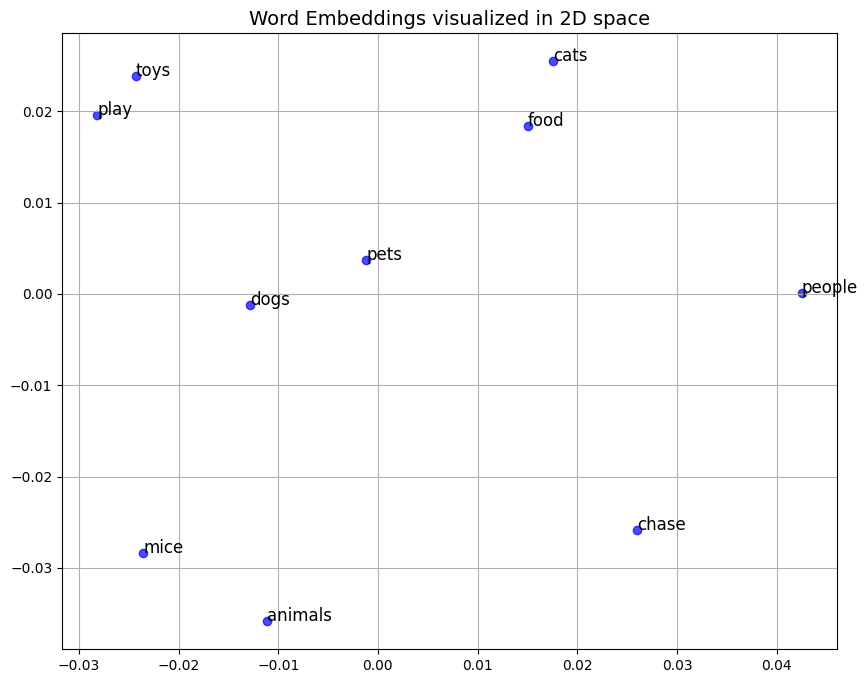

In [10]:
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Our tokenized sentences (we need more data for good embeddings)
sentences = [
    "dogs and cats are common pets".split(),
    "people love their pets".split(),
    "dogs can be trained to play games".split(),
    "some dogs like to chase balls".split(),
    "cats like to play with toys".split(),
    "many cats enjoy chasing mice".split(),
    "people feed their pets special food".split(),
    "healthy food keeps pets active".split(),
    "dogs need regular exercise".split(),
    "cats sleep for many hours each day".split(),
    "pet owners take care of their animals".split(),
    "veterinarians help sick pets get better".split(),
    "dogs can learn many different tricks".split(),
    "cats are often independent animals".split(),
    "some people prefer dogs as pets".split(),
    "others prefer to have pet cats".split()
]

# Train Word2Vec model
# Parameters:
# - sentences: our input text
# - vector_size: the dimensionality of our word vectors
# - window: how many words to consider as context
# - min_count: ignore words that appear less than this
# - workers: threads for training
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# Get the vocabulary
vocab = list(model.wv.index_to_key)
print(f"Vocabulary size: {len(vocab)}")
print(f"Some words in vocabulary: {vocab[:10]}")

# Get vector for a specific word
print("\nVector for 'dogs':")
print(model.wv['dogs'][:10])  # Show only first 10 dimensions for readability

# Find most similar words
print("\nWords most similar to 'dogs':")
similar_words = model.wv.most_similar('dogs', topn=5)
for word, similarity in similar_words:
    print(f"  {word}: {similarity:.4f}")

# Visualize some word vectors in 2D space
def plot_words(model, words):
    # Get the word vectors
    word_vectors = [model.wv[word] for word in words]
    
    # Reduce to 2 dimensions with PCA
    pca = PCA(n_components=2)
    result = pca.fit_transform(word_vectors)
    
    # Create a scatter plot
    plt.figure(figsize=(10, 8))
    plt.scatter(result[:, 0], result[:, 1], c='blue', alpha=0.7)
    
    # Add labels for each point
    for i, word in enumerate(words):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]), fontsize=12)
    
    plt.title("Word Embeddings visualized in 2D space", fontsize=14)
    plt.grid(True)
    plt.show()

# Select some interesting words to visualize
words_to_plot = ['dogs', 'cats', 'pets', 'play', 'chase', 'food', 'people', 'animals', 'toys', 'mice']
words_to_plot = [w for w in words_to_plot if w in vocab]
plot_words(model, words_to_plot)

### ⚡ Challenge: Small Dataset Limitations

You'll notice that our Word2Vec model isn't very good with this tiny dataset. In real applications, Word2Vec is typically trained on billions of words! What kinds of problems do you see with our small model?

### 📖 **How Skip-gram Actually Works**

Let's break down the mathematics behind skip-gram:

1. We have two embeddings for each word:
   - Target embeddings (when word is the center word)
   - Context embeddings (when word is a context word)

2. For a target word $w$ and context word $c$, the probability of $c$ being a real context word is:
   
   $$P(+|w, c) = \sigma(c \cdot w) = \frac{1}{1 + e^{-c \cdot w}}$$

   Where $\sigma$ is the sigmoid function and $c \cdot w$ is the dot product.

3. The training objective maximizes the probability of real context words and minimizes the probability of random "negative sample" words.

### 💡 Curiosity: Word Analogies

One of the most fascinating properties of Word2Vec embeddings is their ability to capture analogies through vector arithmetic. The classic example is:

$$\text{king} - \text{man} + \text{woman} \approx \text{queen}$$

This means that the vector difference between "king" and "man" captures something like a "royalty" relationship, which when added to "woman" gives us "queen".

### 🧪 Try it yourself: Using Pre-trained Embeddings

In practice, you'll often use pre-trained embeddings rather than training your own. Let's see how to use pre-trained GloVe embeddings:

In [11]:

import numpy as np
import requests
import zipfile
import io
import os

# Function to download and load GloVe embeddings
def load_glove_embeddings(dimension=50):
    """
    Downloads and loads GloVe embeddings with the specified dimension.
    Returns a dictionary mapping words to their vectors.
    """
    # Check if we've already downloaded the file
    glove_file = f"glove.6B.{dimension}d.txt"
    
    if not os.path.exists(glove_file):
        # URL for the GloVe 6B embeddings
        url = "https://nlp.stanford.edu/data/glove.6B.zip"
        
        print("Downloading GloVe embeddings...")
        r = requests.get(url)
        
        # Unzip the file
        print("Extracting zip file...")
        z = zipfile.ZipFile(io.BytesIO(r.content))
        z.extractall()
        
        print(f"Downloaded and extracted GloVe embeddings to {os.getcwd()}")
    
    # Load the embeddings
    print(f"Loading {dimension}-dimensional GloVe embeddings...")
    embeddings = {}
    
    with open(glove_file, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.rstrip().split(' ')
            word = values[0]
            vector = np.array([float(val) for val in values[1:]])
            embeddings[word] = vector
    
    print(f"Loaded {len(embeddings)} word vectors.")
    return embeddings

# Load the embeddings (small dimension for faster loading)
# Note: This will download a ~800MB file if you run it!
# For the notebook, we'll comment this out to avoid unintended downloads
# glove_embeddings = load_glove_embeddings(50)

# Example: Computing analogies (king - man + woman = ?)
def compute_analogy(embeddings, word1, word2, word3):
    """
    Computes word analogy: word1 - word2 + word3 = ?
    Returns the most similar word to the resulting vector.
    """
    # Check if all words are in the vocabulary
    for word in [word1, word2, word3]:
        if word not in embeddings:
            print(f"'{word}' not in vocabulary.")
            return None
    
    # Compute the analogy vector
    target_vector = embeddings[word1] - embeddings[word2] + embeddings[word3]
    
    # Find the most similar word
    best_word = None
    best_similarity = -float('inf')
    
    for word, vector in embeddings.items():
        # Skip the input words
        if word in [word1, word2, word3]:
            continue
        
        # Compute cosine similarity
        similarity = np.dot(vector, target_vector) / (np.linalg.norm(vector) * np.linalg.norm(target_vector))
        
        if similarity > best_similarity:
            best_similarity = similarity
            best_word = word
    
    return best_word, best_similarity

# Example usage (commented out to avoid downloading)
# result, similarity = compute_analogy(glove_embeddings, 'king', 'man', 'woman')
# print(f"king - man + woman = {result} (similarity: {similarity:.4f})")



## 7. Applications and Limitations of Vector Semantics

### 📖 **Applications of Vector Semantics**

Word embeddings are used in a wide variety of NLP tasks:

1. **Finding similar words** (thesaurus creation)
2. **Document similarity** (for information retrieval, plagiarism detection)
3. **Recommendation systems** (suggesting similar content)
4. **Machine translation** (mapping words between languages)
5. **Sentiment analysis** (understanding positive/negative opinions)
6. **Named entity recognition** (identifying proper nouns)

### 📖 **Bias in Embeddings**

One major issue with word embeddings is that they capture and amplify biases present in the training data.

Examples of problematic analogies found in embeddings:
- man : computer_programmer :: woman : homemaker
- father : doctor :: mother : nurse

These biases aren't just theoretical problems - they can lead to:
1. **Allocational harms**: Unfair allocation of resources (e.g., job search algorithms favoring men for certain positions)
2. **Representational harms**: Demeaning or ignoring certain social groups

### 💡 Curiosity: Debiasing Embeddings

Researchers have developed techniques to reduce bias in embeddings, such as:
1. Identifying and removing the "gender direction" in the vector space
2. Creating new training objectives that specifically reduce bias

However, completely eliminating bias remains an open problem!

### 📖 **Contextual vs. Static Embeddings**

Static embeddings like Word2Vec and GloVe have one major limitation: a word has the same embedding regardless of context.

For example, the word "bank" might refer to:
- A financial institution
- The side of a river
- To tilt an aircraft

Modern NLP systems use **contextual embeddings** (like BERT, GPT, etc.) that produce different representations for words based on their surrounding context.

## 8. Review and Practical Tips

### 🎯 Summary of Key Concepts

1. **Vector semantics** represents words as points in a multidimensional space
2. **Sparse representations** (TF-IDF, PPMI) directly count co-occurrences
3. **Dense representations** (Word2Vec, GloVe) learn lower-dimensional embeddings that capture semantic relationships
4. **Similarity measures** like cosine similarity quantify how related words are
5. **Applications** include document similarity, word similarity, and many downstream NLP tasks
6. **Limitations** include bias and the inability of static embeddings to handle context

### ⚙️ Practical Tips for Working with Embeddings

1. **Don't reinvent the wheel**: Use pre-trained embeddings for most tasks
2. **Choose the right embeddings**: Different embeddings are optimized for different tasks
3. **Fine-tune when needed**: You can further train pre-trained embeddings on your specific data
4. **Be aware of bias**: Consider debiasing techniques for sensitive applications
5. **Consider contextual embeddings**: For state-of-the-art performance, use contextual models like BERT

### 🧪 Final quiz: Test your understanding

1. What's the main difference between sparse and dense word vectors?
2. Why is TF-IDF better than raw word counts for document similarity?
3. What problem does PPMI solve compared to raw co-occurrence counts?
4. How does Word2Vec learn word embeddings without explicit supervision?
5. Name one way that bias can manifest in word embeddings.

<details>
<summary>Click to see answers</summary>

1. Sparse vectors have mostly zeros and dimensions equal to vocabulary size, while dense vectors have mostly non-zero values and lower dimensionality (50-1000).
2. TF-IDF downweights common words that appear in many documents, focusing instead on distinctive words that characterize a document.
3. PPMI measures how much more frequently words co-occur than expected by chance, reducing the impact of common words that co-occur with everything.
4. Word2Vec uses self-supervision - it creates a prediction task (predicting context words given a target word) and uses the text itself as training data.
5. Examples include gender stereotypes in occupation words (e.g., programmer associated with male terms), racial biases in sentiment associations, or cultural stereotypes.
</details>

## 9. Further Learning Resources

If you want to learn more about vector semantics and word embeddings, here are some excellent resources:

1. **Books**:
   - "Speech and Language Processing" by Jurafsky & Martin (Chapter 6)
   - "Natural Language Processing with PyTorch" by Rao & McMahan

2. **Online Courses**:
   - Stanford CS224N: Natural Language Processing with Deep Learning
   - Fast.ai NLP Course

3. **Papers**:
   - "Efficient Estimation of Word Representations in Vector Space" (original Word2Vec paper)
   - "GloVe: Global Vectors for Word Representation"
   - "Man is to Computer Programmer as Woman is to Homemaker? Debiasing Word Embeddings"

4. **Tools and Libraries**:
   - Gensim: Full-featured library for vector semantics
   - spaCy: NLP library with pre-trained embeddings
   - TensorFlow Text & TensorFlow Hub: Embeddings and text processing tools